In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import copy
from sklearn.linear_model import Ridge

In [6]:
class LinUCB:
    def __init__(self, alpha=1, num_arms=1, num_contexts=1, lambda_=1):
        self.alpha = alpha
        self.lambda_ = lambda_
        self.A = [np.eye(num_contexts) * lambda_ for _ in range(num_arms)]
        self.b = [np.zeros(num_contexts) for _ in range(num_arms)]

    def update(self, arm, reward, context):
        self.A[arm] += np.outer(context, context)
        self.b[arm] += reward * context

    def predict(self, arm, context):
        theta = np.linalg.inv(self.A[arm]).dot(self.b[arm])
        p = context.dot(theta) + self.alpha * np.sqrt(context.dot(np.linalg.inv(self.A[arm])).dot(context))
        return p


    
class TestEnvironment:
    def __init__(self, num_arms, num_contexts):
        # Inicializamos los pesos para cada brazo
        self.weights = np.random.normal(size=(num_arms, num_contexts))
        
    def get_reward(self, arm, context):
        # Calculamos la recompensa para un brazo dado un contexto
        mean_reward = self.weights[arm].dot(context)
        reward = np.random.normal(loc=mean_reward)
        return reward


In [12]:
num_arms = 3
num_contexts = 5
num_episodes = 1000
alpha_ucb = 0.1

# Inicializamos el entorno y el agente
env = TestEnvironment(num_arms, num_contexts)
agent = LinUCB(alpha_ucb, num_arms, num_contexts)

# Registramos la acción seleccionada y la recompensa en cada episodio
actions = []
rewards = []

# Registramos si la acción seleccionada es óptima en cada episodio
is_optimal_list = []

for episode in range(num_episodes):
    context = np.random.normal(size=num_contexts)
    
    # El agente hace predicciones para cada brazo
    predictions = [agent.predict(arm, context) for arm in range(num_arms)]
    
    # El agente selecciona la acción con la mayor predicción
    action = np.argmax(predictions)
    
    # Calculamos la acción óptima para el contexto actual
    optimal_action = np.argmax([w.dot(context) for w in env.weights])
    
    # Verificamos si la acción seleccionada es la óptima
    is_optimal = (action == optimal_action)
    
    is_optimal_list.append(is_optimal)
    
    # Obtenemos la recompensa del entorno
    reward = env.get_reward(action, context)
    
    # Actualizamos el agente
    agent.update(action, reward, context)
    
    # Registramos la acción y la recompensa
    actions.append(action)
    rewards.append(reward)

# Calculamos la recompensa acumulada
cumulative_reward = np.cumsum(rewards)

# Calculamos la proporción de veces que la acción seleccionada fue óptima
optimal_action_ratio = np.mean(is_optimal_list)

print(f"La acción seleccionada fue óptima en el {optimal_action_ratio * 100}% de los episodios.")


La acción seleccionada fue óptima en el 96.2% de los episodios.


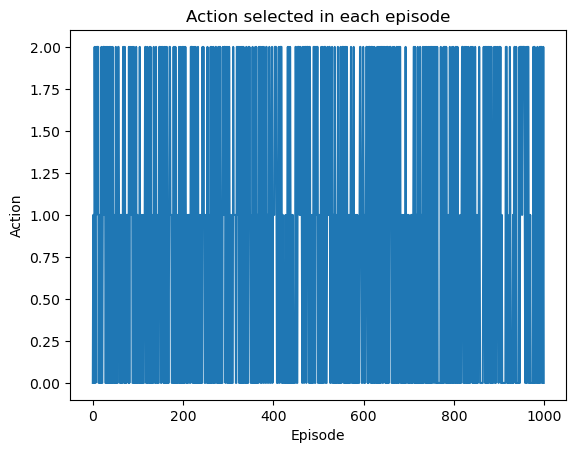

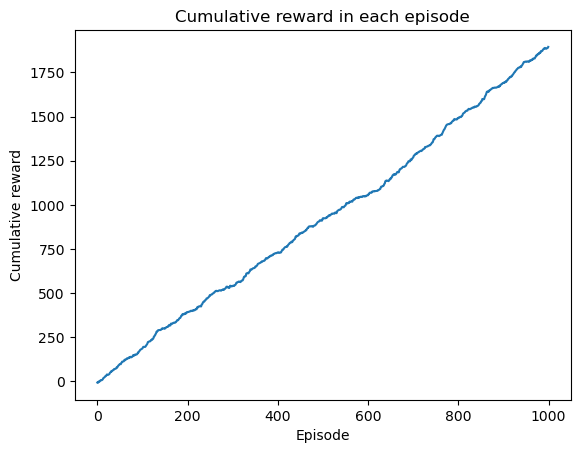

In [10]:
# Graficamos la acción seleccionada en cada episodio
plt.figure()
plt.plot(actions)
plt.xlabel('Episode')
plt.ylabel('Action')
plt.title('Action selected in each episode')

# Graficamos la recompensa acumulada en cada episodio
plt.figure()
plt.plot(cumulative_reward)
plt.xlabel('Episode')
plt.ylabel('Cumulative reward')
plt.title('Cumulative reward in each episode')

plt.show()
